**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
library("FactoMineR")
library("factoextra")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "matrix.annotation.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_full_cres = dat
print(dim(dat))
head(dat, 3)

[1] 87610   537


Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [5]:
dat = dat_region_annot_full_cres
dat = dat %>% tibble::column_to_rownames("Region")
mat_region_annot_full_cres = dat
print(dim(dat))
head(dat, 3)

[1] 87610   536


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [6]:
mat = mat_region_annot_full_cres
vec = apply(mat, 2, sum)
sum(vec == 0)

[1] 0

In [7]:
mat = mat_region_annot_full_cres
vec = apply(mat, 1, sum)
sum(vec == 0)

[1] 0

In [8]:
mat = mat_region_annot_full_cres
vec = rownames(mat)
lst = lapply(mat, as.factor)
mat = bind_cols(lst)
mat = data.frame(mat)
rownames(mat) = vec

mat_region_annot_prep = mat

In [9]:
mat = mat_region_annot_prep
res = MCA(mat, graph = FALSE)
res_mca_region_annot = res

In [10]:
res = res_mca_region_annot
mat = get_eigenvalue(res)
vec = mat[,"cumulative.variance.percent"]

idx = which(vec < 70)
num = max(idx)
num

[1] 180

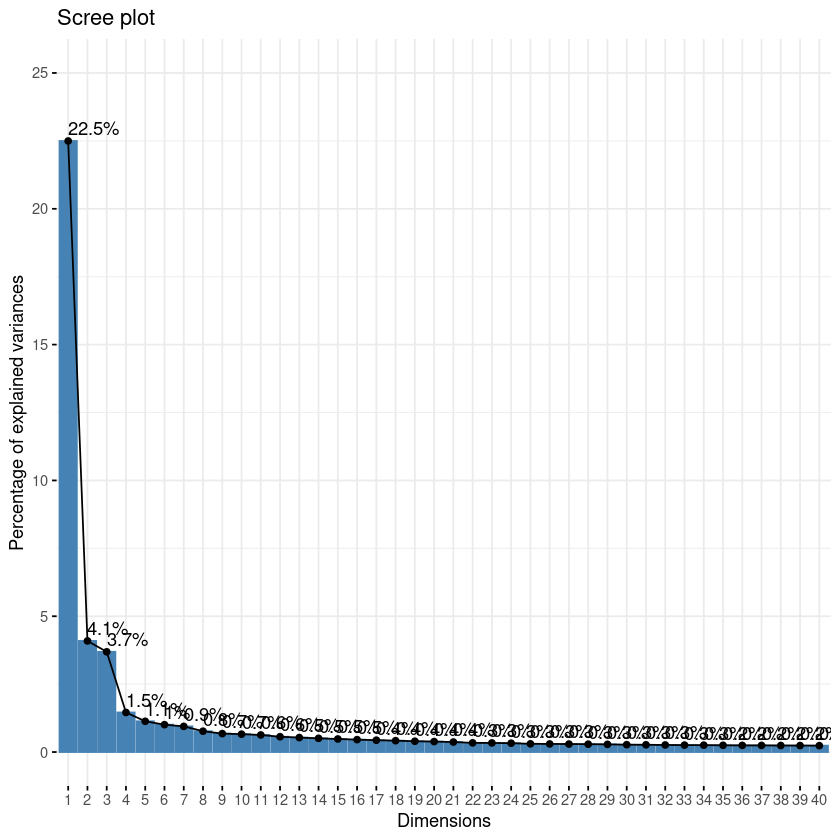

In [13]:
options(repr.plot.width = 7, repr.plot.height=7)
fviz_screeplot(res, addlabels = TRUE, ylim = c(0, 25), ncp = 40)

In [14]:
mat = mat_region_annot_prep
res = MCA(mat, ncp = 180, graph = FALSE)
res_mca_region_annot = res

In [15]:
res = res_mca_region_annot
lst = get_mca_ind(res)
mat = lst$coord
dat = mat %>% as.data.frame %>% rownames_to_column(var = "Region")

dat_region_annot_mca = dat
print(lst)
cat("\n", dim(dat), "\n")
head(dat, 3)

Multiple Correspondence Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

 87610 181 


,Region,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,⋯,Dim 171,Dim 172,Dim 173,Dim 174,Dim 175,Dim 176,Dim 177,Dim 178,Dim 179,Dim 180
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1:10038-10405,-0.2920876,0.05965541,0.08972286,0.09700090,0.01163722,0.04620806,-0.019806452,-0.02641152,-0.01434372,⋯,0.0200514025,0.002604579,0.0825908016,-0.038212345,-0.080441239,-2.530163e-06,-0.0385378814,0.005644528,0.07211528,0.023875425
2,chr1:16025-16338,-0.3053998,0.02516680,0.07996359,0.03314702,0.04914668,-0.01095490,0.007739505,-0.01436278,-0.01242096,⋯,0.0002657319,0.001665053,0.0078937515,0.006689914,-0.007339159,2.073737e-03,-0.0003925614,-0.001908440,0.01063666,-0.006099934
3,chr1:115429-115969,0.1904580,0.02712486,-0.36342208,0.15478893,-0.04588837,0.04550502,-0.078477202,-0.02400556,-0.02014296,⋯,-0.0100268324,-0.039760115,-0.0001525988,0.007520691,0.020743040,-3.124581e-02,0.0043128114,-0.037045477,-0.04781733,-0.029353912


In [16]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "matrix.mca_var70.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = dat_region_annot_mca
write_tsv(dat, txt_fpath)